In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import math
import random
from random import uniform
from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from skimage.feature import hog
#...

## Loading the datasets

In [2]:
# Loading the main dataset and print it
dataset = pd.read_csv('./arabic_dataset.csv', delimiter=";", index_col=0)
dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1698,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1699,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Loading the competition set and print it
competition = pd.read_csv('./competition.csv', delimiter=";", index_col=0)

In [4]:
competition
# You should see that there are no labels in this dataset. You'll have to predict them.
# So this dataset can not be used to fit any classifier, just to make predictions with classifiers that you designed

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


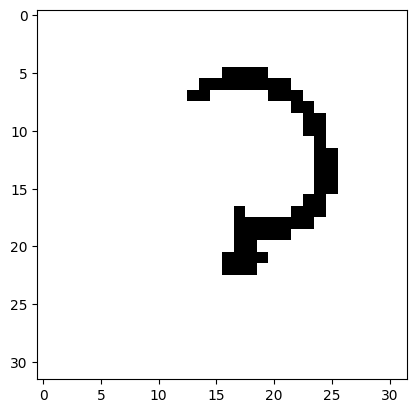

In [5]:
# Here you can see the image 0 of the dataset
idx = 0
plt.imshow(dataset.iloc[idx,1:].to_numpy().reshape(32,32),cmap = 'Greys')
# you can change the value of idx if you want to see another image

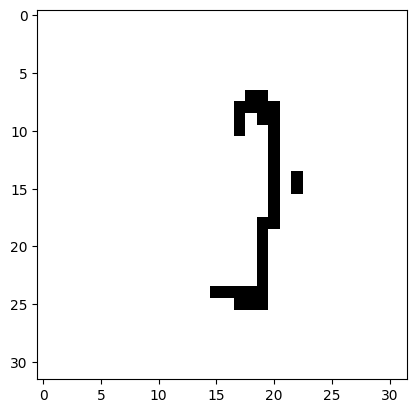

In [6]:
# Same with the image 0 of competition
idx = 111
plt.imshow(competition.iloc[idx,:].to_numpy().reshape(32,32),cmap = 'Greys')

# First guided submission to Kaggle

In [7]:
import random
pred = random.choices(np.unique(dataset.label), k=500)
pred
# pred is a vector with 500 random values from the set of possible label values 
# we will assume that these are our 500 predictions for the competition set

[2,
 2,
 6,
 22,
 12,
 6,
 6,
 16,
 16,
 1,
 16,
 22,
 1,
 6,
 1,
 2,
 18,
 22,
 2,
 18,
 12,
 6,
 1,
 16,
 22,
 1,
 16,
 22,
 16,
 18,
 16,
 1,
 6,
 18,
 2,
 1,
 1,
 22,
 12,
 2,
 18,
 18,
 16,
 12,
 22,
 18,
 18,
 6,
 6,
 22,
 18,
 22,
 1,
 16,
 2,
 22,
 16,
 22,
 16,
 1,
 6,
 6,
 16,
 6,
 16,
 22,
 16,
 12,
 18,
 2,
 16,
 6,
 1,
 6,
 6,
 16,
 1,
 1,
 16,
 18,
 12,
 16,
 12,
 12,
 6,
 16,
 18,
 18,
 18,
 18,
 12,
 1,
 16,
 12,
 1,
 22,
 2,
 1,
 16,
 1,
 18,
 2,
 16,
 22,
 16,
 6,
 2,
 1,
 6,
 12,
 1,
 12,
 2,
 16,
 16,
 18,
 22,
 18,
 2,
 18,
 12,
 22,
 16,
 12,
 6,
 1,
 12,
 1,
 22,
 18,
 1,
 2,
 18,
 22,
 2,
 2,
 2,
 18,
 6,
 12,
 18,
 12,
 1,
 2,
 2,
 6,
 18,
 6,
 22,
 22,
 1,
 1,
 22,
 6,
 18,
 6,
 1,
 16,
 18,
 22,
 18,
 6,
 12,
 6,
 18,
 12,
 2,
 22,
 16,
 16,
 1,
 2,
 1,
 1,
 1,
 6,
 22,
 1,
 2,
 1,
 18,
 12,
 22,
 16,
 2,
 22,
 2,
 6,
 1,
 22,
 6,
 22,
 18,
 16,
 2,
 16,
 22,
 16,
 16,
 22,
 16,
 18,
 16,
 18,
 12,
 12,
 18,
 6,
 2,
 6,
 1,
 1,
 1,
 12,
 18,
 1,
 1,
 12,
 18,

In [8]:
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df

,Id,label
0,1,2
1,2,2
2,3,6
3,4,22
4,5,12
...,...,...
495,496,6
496,497,2
497,498,16
498,499,22


In [9]:
# then save it to a csv file
df.to_csv('myfirstsubmission.csv', index=False)
# You should now have a csv file on your working directory
# Go on Kaggle website, join the competition and drag this file into 'Submit predictions'. You should have a score
# This score might not be high because we have just done random predictions
# but when you'll design classifiers and make more clever predictions you will improve your score
# Later, when you'll have found an interesting classifier for each family, you have to predict the competition set
# with this classifier, put these predictions into a vector (like pred above) and apply the same procedure as
# in the previous cell

## Part 1 : preliminar analysis of the dataset

In [10]:
dataset.shape

(1700, 1025)

In [11]:
dataset.label.value_counts(normalize=True)

label
12    0.150000
6     0.147059
22    0.144118
18    0.141765
1     0.140000
2     0.140000
16    0.137059
Name: proportion, dtype: float64

### Train / validation / test split

In [12]:
data_train, data_test = train_test_split(dataset, test_size = .3)
data_valid, data_test = train_test_split(data_test, test_size = .5)

## Part 2 : classifiers based on raw images

### Decision trees

In [13]:
clf_ = tree.DecisionTreeClassifier()
path_ = clf_.cost_complexity_pruning_path(data_train.iloc[:,1:], data_train.label)
ccp_alphas_ = path_.ccp_alphas

In [14]:
scores_valid = []
for alpha in ccp_alphas_:
    dt_pruned_ = tree.DecisionTreeClassifier(ccp_alpha = alpha).fit(data_train.iloc[:,1:], data_train.label)
    scores_valid.append(dt_pruned_.score(data_valid.iloc[:,1:], data_valid.label))

In [15]:
# Accuracy score of the selected tree
idx = scores_valid.index(max(scores_valid))
print(f'alpha\t\tvalid. score\n{ccp_alphas_[idx]:.5f}\t\t{scores_valid[idx]:.3f}')

alpha		valid. score
0.00126		0.545


In [16]:
dt_pruned = tree.DecisionTreeClassifier(ccp_alpha = ccp_alphas_[idx]).fit(data_train.iloc[:,1:], data_train.label)

In [17]:
dt_pruned.score(data_valid.iloc[:,1:], data_valid.label)

0.4980392156862745

In [18]:
dt_pruned.score(data_test.iloc[:,1:], data_test.label)

0.5019607843137255

In [19]:
pred = dt_pruned.predict(competition)
df.label = pred
df

,Id,label
0,1,2
1,2,16
2,3,2
3,4,16
4,5,2
...,...,...
495,496,22
496,497,22
497,498,18
498,499,22


In [20]:
df.to_csv('dt_pruned_submission.csv', index=False)

### SVM

In [21]:
c_values = [0.01, 0.05, 1, 5, 10, 50, 100, 500, 1000]

#### Linear

In [22]:
scores_valid = []
for c in c_values:
    model_svm = svm.SVC(C=c, kernel='linear')
    model_svm.fit(data_train.iloc[:,1:], data_train.label)
    scores_valid.append(model_svm.score(data_valid.iloc[:,1:], data_valid.label))

In [23]:
best_c = c_values[scores_valid.index(max(scores_valid))]
print(best_c)
model_svm = svm.SVC(C=best_c, kernel='linear').fit(data_train.iloc[:,1:], data_train.label)

0.05


In [24]:
model_svm.score(data_valid.iloc[:,1:], data_valid.label)

0.7098039215686275

In [25]:
model_svm.score(data_test.iloc[:,1:], data_test.label)

0.7019607843137254

In [26]:
pred = model_svm.predict(competition)
df.label = pred
df

,Id,label
0,1,22
1,2,12
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,12
497,498,18
498,499,22


In [27]:
df.to_csv('svm_linear_submission.csv', index=False)

#### RBF


In [28]:
gamma_values = [0.001, 0.01, 0.1, 1, 10, 50, 100]

In [29]:
best_accuracy = 0
best_c = 0
best_gamma = 0

for c in c_values:
    for g in gamma_values:
        model_svm = svm.SVC(C=c, gamma=g, kernel='rbf').fit(data_train.iloc[:,1:], data_train.label)
        accuracy = model_svm.score(data_valid.iloc[:,1:], data_valid.label)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_c = c
            best_gamma = g

In [30]:
print(f'Best params. :\nC\tgamma\tacc.\n{best_c}\t{best_gamma}\t{best_accuracy}')

Best params. :
C	gamma	acc.
1	0.01	0.7803921568627451


In [31]:
model_svm = svm.SVC(C=best_c, gamma=best_gamma, kernel='rbf').fit(data_train.iloc[:,1:], data_train.label)

In [32]:
model_svm.score(data_valid.iloc[:,1:], data_valid.label)

0.7803921568627451

In [33]:
model_svm.score(data_test.iloc[:,1:], data_test.label)

0.7529411764705882

In [34]:
pred = model_svm.predict(competition)
df.label = pred
df

,Id,label
0,1,22
1,2,16
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,12
497,498,18
498,499,22


In [35]:
df.to_csv('svm_rbf_submission.csv', index=False)

#### Polynomial

In [36]:
degree_values = list(range(2,5))

In [37]:
best_accuracy = 0
best_degree = 0
best_c = 0

for c in c_values:
    for d in degree_values:
        model_svm = svm.SVC(C=c, degree=d, kernel='poly').fit(data_train.iloc[:,1:], data_train.label)
        accuracy = model_svm.score(data_valid.iloc[:,1:], data_valid.label)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_c = c
            best_degree = d

In [38]:
print(f'Best params. :\nC\tdegree\tacc.\n{best_c}\t{best_degree}\t{best_accuracy}')

Best params. :
C	degree	acc.
5	2	0.8117647058823529


In [39]:
model_svm = svm.SVC(C=best_c, degree=best_degree, kernel='poly').fit(data_train.iloc[:,1:], data_train.label)

In [40]:
model_svm.score(data_valid.iloc[:,1:], data_valid.label)

0.8117647058823529

In [41]:
model_svm.score(data_test.iloc[:,1:], data_test.label)

0.792156862745098

In [42]:
pred = model_svm.predict(competition)
df.label = pred
df

,Id,label
0,1,22
1,2,22
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,16
497,498,6
498,499,22


In [43]:
df.to_csv('svm_poly_submission.csv', index=False)

### K-nearest-neighbour

In [44]:
knn_values = list(range(1,21))

In [45]:
scores_valid = []
for knn in knn_values:
    n_n = KNeighborsClassifier(n_neighbors=knn)
    n_n.fit(data_train.iloc[:,1:], data_train.label)
    scores_valid.append(n_n.score(data_valid.iloc[:,1:].values, data_valid.label))

best_knn = knn_values[scores_valid.index(max(scores_valid))]

c:\Users\Konan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Konan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Konan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Konan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Konan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature

In [46]:
n_n = KNeighborsClassifier(n_neighbors=best_knn)
n_n.fit(data_train.iloc[:,1:], data_train.label)

KNeighborsClassifier(n_neighbors=1)

In [47]:
n_n.score(data_valid.iloc[:,1:].values, data_valid.label)

c:\Users\Konan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.7137254901960784

In [48]:
n_n.score(data_test.iloc[:,1:].values, data_test.label)

c:\Users\Konan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.6901960784313725

In [49]:
pred = n_n.predict(competition.values)
df.label = pred
df

c:\Users\Konan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Id,label
0,1,22
1,2,18
2,3,16
3,4,16
4,5,16
...,...,...
495,496,2
496,497,16
497,498,18
498,499,22


In [50]:
df.to_csv('knn_submission.csv', index=False)

### Random forest

In [51]:
nb_trees_values = list(range(50,101))

In [52]:
scores_valid = []
for nb_trees in nb_trees_values:
    r_f = RandomForestClassifier(n_estimators=nb_trees)
    r_f.fit(data_train.iloc[:,1:], data_train.label)
    scores_valid.append(r_f.score(data_valid.iloc[:,1:], data_valid.label))
best_nb_trees =  nb_trees_values[scores_valid.index(max(scores_valid))]

In [53]:
r_f = RandomForestClassifier(n_estimators=best_nb_trees)
r_f.fit(data_train.iloc[:,1:],data_train.label)

RandomForestClassifier(n_estimators=76)

In [54]:
r_f.score(data_valid.iloc[:,1:], data_valid.label)

0.7803921568627451

In [55]:
r_f.score(data_test.iloc[:,1:], data_test.label)

0.7450980392156863

In [56]:
pred = r_f.predict(competition.values)
df.label = pred
df

c:\Users\Konan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,Id,label
0,1,22
1,2,1
2,3,16
3,4,16
4,5,16
...,...,...
495,496,6
496,497,16
497,498,22
498,499,22


In [57]:
df.to_csv('rf_submission.csv', index=False)

### Logistic regression

In [58]:
l_r = LogisticRegression(multi_class='multinomial', max_iter=2000)
l_r.fit(data_train.iloc[:,1:], data_train.label)

LogisticRegression(max_iter=2000, multi_class='multinomial')

In [59]:
l_r.score(data_valid.iloc[:,1:], data_valid.label)

0.6313725490196078

In [60]:
l_r.score(data_test.iloc[:,1:], data_test.label)

0.6588235294117647

In [61]:
pred = l_r.predict(competition.values)
df.label = pred
df

c:\Users\Konan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,Id,label
0,1,22
1,2,18
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,12
497,498,18
498,499,22


In [62]:
df.to_csv('lr_submission.csv', index=False)

## Part 3 : using HOG representation

In [63]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(32,32), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(5,5), block_norm='L2')))

In [64]:
def my_hog_comp(row, ori, cell):
    return(pd.Series(hog(row.iloc[0:].to_numpy().reshape(32,32), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(5,5), block_norm='L2')))

In [65]:
hog_train = data_train.apply(my_hog, axis=1, args=(9,6))
hog_valid = data_valid.apply(my_hog, axis=1, args=(9,6))
hog_test = data_test.apply(my_hog, axis=1, args=(9,6))
hog_comp = competition.apply(my_hog_comp, axis=1, args=(9,6))
hog_train['label'] = data_train.label
hog_valid['label'] = data_valid.label
hog_test['label'] = data_test.label

hog_train

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,label
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,2
670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.24189,0.0,0.21769,0.0,0.0,0.0,0.0,0.0,0.0,22
1595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,16
424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,12
255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,6
965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,18
1391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,16
935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,12


In [66]:
hog_comp

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Decision trees

In [67]:
clf_ = tree.DecisionTreeClassifier()
path_ = clf_.cost_complexity_pruning_path(hog_train.iloc[:,:-1], hog_train.label)
ccp_alphas_ = path_.ccp_alphas

In [68]:
scores_valid = []
for alpha in ccp_alphas_:
    dt_pruned_ = tree.DecisionTreeClassifier(ccp_alpha = alpha).fit(hog_train.iloc[:,:-1], hog_train.label)
    scores_valid.append(dt_pruned_.score(hog_valid.iloc[:,:-1], hog_valid.label))

In [69]:
# Accuracy score of the selected tree
idx = scores_valid.index(max(scores_valid))
print(f'alpha\t\tvalid. score\n{ccp_alphas_[idx]:.5f}\t\t{scores_valid[idx]:.3f}')

alpha		valid. score
0.00084		0.714


In [70]:
dt_pruned = tree.DecisionTreeClassifier(ccp_alpha = ccp_alphas_[idx])
dt_pruned.fit(hog_train.iloc[:,:-1], hog_train.label)

DecisionTreeClassifier(ccp_alpha=0.0008403361344537816)

In [71]:
dt_pruned.score(hog_valid.iloc[:,:-1], hog_valid.label)

0.7098039215686275

In [72]:
dt_pruned.score(hog_test.iloc[:,:-1], hog_test.label)

0.6980392156862745

### SVM

In [73]:
c_values = [0.01, 0.05, 1, 5, 10, 50, 100, 500, 1000]

#### Linear

In [74]:
scores_valid = []
for c in c_values:
    model_svm = svm.SVC(C=c, kernel='linear')
    model_svm.fit(hog_train.iloc[:,:-1], hog_train.label)
    scores_valid.append(model_svm.score(hog_valid.iloc[:,:-1], hog_valid.label))

In [75]:
best_c = c_values[scores_valid.index(max(scores_valid))]
print(best_c)

10


In [76]:
model_svm = svm.SVC(C=best_c, kernel='linear').fit(hog_train.iloc[:,:-1], hog_train.label)

In [77]:
model_svm.score(hog_valid.iloc[:,:-1], hog_valid.label)

0.8666666666666667

In [78]:
model_svm.score(hog_test.iloc[:,:-1], hog_test.label)

0.8392156862745098

In [79]:
pred = model_svm.predict(hog_comp)
df.label = pred
df

,Id,label
0,1,22
1,2,16
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,16
497,498,6
498,499,22


In [80]:
df.to_csv('[hog]svm_linear_submission.csv', index=False)

#### RBF

In [81]:
gamma_values = [0.001, 0.01, 0.1, 1, 10, 50, 100]

In [82]:
best_accuracy = 0
best_c = 0
best_gamma = 0

for c in c_values:
    for g in gamma_values:
        model_svm = svm.SVC(C=c, gamma=g, kernel='rbf').fit(hog_train.iloc[:,:-1], hog_train.label)
        accuracy = model_svm.score(hog_valid.iloc[:,:-1], hog_valid.label)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_c = c
            best_gamma = g

In [83]:
print(f'Best params. :\nC\tgamma\tacc.\n{best_c}\t{best_gamma}\t{best_accuracy}')

Best params. :
C	gamma	acc.
5	1	0.9333333333333333


In [84]:
model_svm = svm.SVC(C=10, gamma=0.1, kernel='rbf')
model_svm.fit(hog_train.iloc[:,:-1], hog_train.label)

SVC(C=10, gamma=0.1)

In [85]:
model_svm.score(hog_valid.iloc[:,:-1], hog_valid.label)

0.8588235294117647

In [86]:
model_svm.score(hog_test.iloc[:,:-1], hog_test.label)

0.8470588235294118

In [87]:
pred = model_svm.predict(hog_comp)
df.label = pred

In [88]:
df.to_csv('[hog]svm_rbf_submission.csv', index=False)

#### Polynomial

In [89]:
degree_values = list(range(2,4))

In [90]:
best_accuracy = 0
best_degree = 0
best_c = 0

for c in c_values:
    for d in degree_values:
        model_svm = svm.SVC(C=c, degree=d, kernel='poly').fit(hog_train.iloc[:,:-1], hog_train.label)
        accuracy = model_svm.score(hog_valid.iloc[:,:-1], hog_valid.label)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_c = c
            best_degree = d

In [91]:
print(f'Best params. :\nC\tdegree\tacc.\n{best_c}\t{best_degree}\t{best_accuracy}')

Best params. :
C	degree	acc.
5	2	0.9294117647058824


In [92]:
model_svm = svm.SVC(C=10, degree=2, kernel='poly').fit(hog_train.iloc[:,:-1], hog_train.label)

In [93]:
model_svm.score(hog_valid.iloc[:,:-1], hog_valid.label)

0.9215686274509803

In [94]:
model_svm.score(hog_test.iloc[:,:-1], hog_test.label)

0.8862745098039215

In [95]:
pred = model_svm.predict(hog_comp)
df.label = pred
df

,Id,label
0,1,22
1,2,16
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,16
497,498,6
498,499,22


In [96]:
df.to_csv('[hog]svm_poly_submission.csv', index=False)

### K-nearest-neighbour

In [97]:
knn_values = list(range(1,101))

In [98]:
scores_valid = []
for knn in knn_values:
    n_n = KNeighborsClassifier(n_neighbors=knn)
    n_n.fit(hog_train.iloc[:,:-1], hog_train.label)
    scores_valid.append(n_n.score(hog_valid.iloc[:,:-1].values, hog_valid.label))

best_knn = knn_values[scores_valid.index(max(scores_valid))]

In [99]:
n_n = KNeighborsClassifier(n_neighbors=best_knn)
n_n.fit(hog_train.iloc[:,:-1], hog_train.label)

KNeighborsClassifier(n_neighbors=3)

In [100]:
n_n.score(hog_valid.iloc[:,:-1].values, hog_valid.label)

0.8901960784313725

In [101]:
n_n.score(hog_test.iloc[:,:-1].values, hog_test.label)

0.8745098039215686

In [102]:
pred = n_n.predict(hog_comp.values)
df.label = pred
df

,Id,label
0,1,22
1,2,16
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,16
497,498,6
498,499,22


In [103]:
df.to_csv('[hog]knn_submission.csv', index=False)

### Random forest

In [104]:
nb_trees_values = list(range(10,101))

In [105]:
scores_valid = []
for nb_trees in nb_trees_values:
    r_f = RandomForestClassifier(n_estimators=nb_trees)
    r_f.fit(hog_train.iloc[:,:-1], hog_train.label)
    scores_valid.append(r_f.score(hog_valid.iloc[:,:-1], hog_valid.label))
    
best_nb_trees = nb_trees_values[scores_valid.index(max(scores_valid))]

In [106]:
r_f = RandomForestClassifier(n_estimators=best_nb_trees)
r_f.fit(hog_train.iloc[:,:-1],hog_train.label)

RandomForestClassifier(n_estimators=57)

In [107]:
r_f.score(hog_valid.iloc[:,:-1], hog_valid.label)

0.9137254901960784

In [108]:
r_f.score(hog_test.iloc[:,:-1], hog_test.label)

0.8901960784313725

In [109]:
pred = r_f.predict(hog_comp)
df.label = pred
df

,Id,label
0,1,22
1,2,16
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,16
497,498,6
498,499,22


In [110]:
df.to_csv('[hog]rf_submission.csv', index=False)

### Logistic regression

In [111]:
l_r = LogisticRegression(multi_class='multinomial', max_iter=3000)
l_r.fit(hog_train.iloc[:,:-1], hog_train.label)

LogisticRegression(max_iter=3000, multi_class='multinomial')

In [112]:
l_r.score(hog_valid.iloc[:,:-1], hog_valid.label)

0.8235294117647058

In [113]:
l_r.score(hog_test.iloc[:,:-1], hog_test.label)

0.8117647058823529

In [114]:
pred = l_r.predict(hog_comp)
df.label = pred
df

,Id,label
0,1,22
1,2,16
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,22
497,498,6
498,499,22


In [115]:
df.to_csv('[hog]lr_submission.csv', index=False)